In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
totaldataset = pd.read_csv("drive/My Drive/ocr_data/data.csv")

In [ ]:
import random
# Original dataset has 92,000 rows and 1025 cols
# selection 92000 rows at random for testing for now
a=random.sample(range(0,92000), 92000)
dataset=totaldataset.loc[a]

In [ ]:
dataset.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,pixel_0010,pixel_0011,pixel_0012,pixel_0013,pixel_0014,pixel_0015,pixel_0016,pixel_0017,pixel_0018,pixel_0019,pixel_0020,pixel_0021,pixel_0022,pixel_0023,pixel_0024,pixel_0025,pixel_0026,pixel_0027,pixel_0028,pixel_0029,pixel_0030,pixel_0031,pixel_0032,pixel_0033,pixel_0034,pixel_0035,pixel_0036,pixel_0037,pixel_0038,pixel_0039,...,pixel_0985,pixel_0986,pixel_0987,pixel_0988,pixel_0989,pixel_0990,pixel_0991,pixel_0992,pixel_0993,pixel_0994,pixel_0995,pixel_0996,pixel_0997,pixel_0998,pixel_0999,pixel_1000,pixel_1001,pixel_1002,pixel_1003,pixel_1004,pixel_1005,pixel_1006,pixel_1007,pixel_1008,pixel_1009,pixel_1010,pixel_1011,pixel_1012,pixel_1013,pixel_1014,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
85382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,digit_6
91548,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,digit_9
13218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,character_07_chha
49461,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,character_25_ma
30370,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,character_16_tabala


 **Out of the 1025 columns the first 1024 contains the values of the pixels for the images.
The last column contains the character name.**

In [ ]:
# X = The first 1024 columns
X = dataset.iloc[:,:-1]

# y = The last column
y = dataset.iloc[:,-1]

In [ ]:
num_pixels = X.shape[1]
# 46 characters, consonants "ka" to "gya", and the digits 0 to 9
num_classes = 46
# 32x32 = 1024
img_width = 32
img_height = 32
img_depth = 1

In [ ]:
X.shape[0]

92000

In [ ]:
X_images = X.values.reshape(X.shape[0],img_width,img_height)

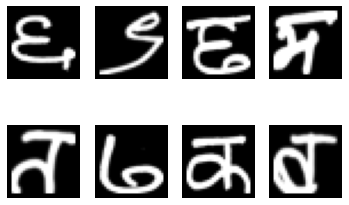

In [ ]:
for i in range(1,9):
    plt.subplot(240+i)
    plt.axis('off')
    plt.imshow(X_images[i-1],cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
dataset.iloc[:,1024].value_counts()

character_09_jha             2000
character_32_patalosaw       2000
character_10_yna             2000
character_26_yaw             2000
character_12_thaa            2000
character_15_adna            2000
character_25_ma              2000
character_13_daa             2000
digit_7                      2000
digit_0                      2000
character_35_tra             2000
character_05_kna             2000
character_11_taamatar        2000
character_08_ja              2000
character_33_ha              2000
character_28_la              2000
digit_1                      2000
digit_5                      2000
digit_4                      2000
digit_2                      2000
character_18_da              2000
character_36_gya             2000
character_17_tha             2000
character_31_petchiryakha    2000
character_04_gha             2000
character_24_bha             2000
character_19_dha             2000
digit_3                      2000
character_21_pa              2000
character_06_c

In [ ]:
# Label encoding the results column
from sklearn.preprocessing import LabelBinarizer
binecoder = LabelBinarizer()
Y = binecoder.fit_transform(y)
print(y.iloc[0],Y[0])

digit_6 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0]


In [ ]:
dataset.iloc[:,500:525].value_counts()

pixel_0500  pixel_0501  pixel_0502  pixel_0503  pixel_0504  pixel_0505  pixel_0506  pixel_0507  pixel_0508  pixel_0509  pixel_0510  pixel_0511  pixel_0512  pixel_0513  pixel_0514  pixel_0515  pixel_0516  pixel_0517  pixel_0518  pixel_0519  pixel_0520  pixel_0521  pixel_0522  pixel_0523  pixel_0524
0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0           0             909
                                                                                                                                                                                                                                                                                                1              60
1           0           0           0           0           0           0           0    

In [ ]:
# data normalization
X = X/255

In [ ]:
seed = 123
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=seed)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Model

In [ ]:
def baseline_model():
    model = Sequential()
    # num_pixels = 1024
    model.add(Dense(num_pixels,
                    input_dim=num_pixels,
                    kernel_initializer='normal',
                    activation='relu'                       
                   ))
    model.add(Dense(num_classes,
                   kernel_initializer='normal',
                   activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
    return model

In [ ]:
model = baseline_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_5 (Dense)              (None, 46)                47150     
Total params: 1,096,750
Trainable params: 1,096,750
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epochs = 10
batch_size = 200
history = model.fit(X_train.values, y_train, validation_split=0.20, epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/10
295/295 - 1s - loss: 1.0883 - accuracy: 0.7116 - val_loss: 0.6614 - val_accuracy: 0.8174
Epoch 2/10
295/295 - 1s - loss: 0.4523 - accuracy: 0.8793 - val_loss: 0.4124 - val_accuracy: 0.8883
Epoch 3/10
295/295 - 1s - loss: 0.2660 - accuracy: 0.9305 - val_loss: 0.3259 - val_accuracy: 0.9098
Epoch 4/10
295/295 - 1s - loss: 0.1734 - accuracy: 0.9563 - val_loss: 0.2878 - val_accuracy: 0.9188
Epoch 5/10
295/295 - 1s - loss: 0.1169 - accuracy: 0.9707 - val_loss: 0.2684 - val_accuracy: 0.9231
Epoch 6/10
295/295 - 1s - loss: 0.0795 - accuracy: 0.9823 - val_loss: 0.2367 - val_accuracy: 0.9327
Epoch 7/10
295/295 - 1s - loss: 0.0532 - accuracy: 0.9891 - val_loss: 0.2258 - val_accuracy: 0.9361
Epoch 8/10
295/295 - 1s - loss: 0.0355 - accuracy: 0.9940 - val_loss: 0.2305 - val_accuracy: 0.9345
Epoch 9/10
295/295 - 1s - loss: 0.0243 - accuracy: 0.9966 - val_loss: 0.2191 - val_accuracy: 0.9393
Epoch 10/10
295/295 - 1s - loss: 0.0166 - accuracy: 0.9983 - val_loss: 0.2292 - val_accuracy: 0.9391

In [ ]:
scores = model.evaluate(X_test.values, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 93.59%


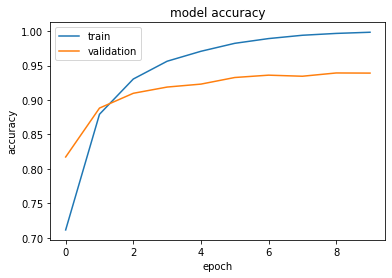

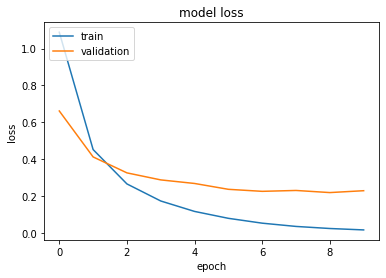

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf

In [ ]:
predictions = model.predict(X_test)
predicted_labels = [np.argmax(i) for i in predictions]
y_test_labels = [np.argmax(i) for i in y_test]

confusoinMatrix = tf.math.confusion_matrix(labels=y_test_labels, predictions=predicted_labels)

Text(159.0, 0.5, 'Real Values')

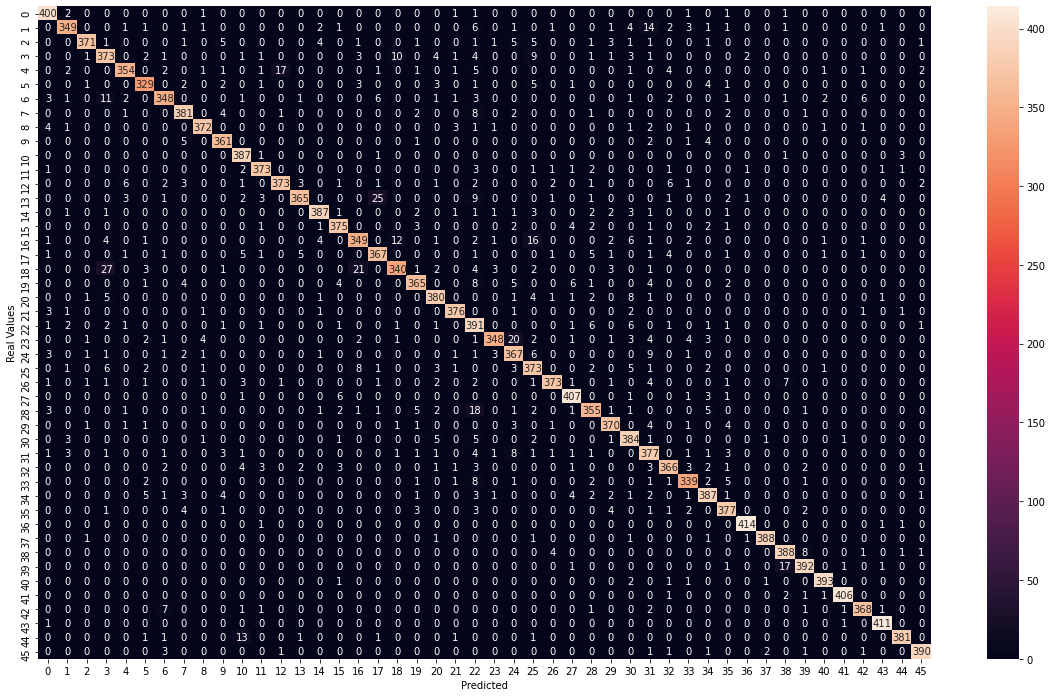

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,12))
sns.heatmap(confusoinMatrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Real Values')